In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Vabil\Downloads\pavankalyan files\final_cleaned_outliers_laptops_data.csv")
df.head()

,Unnamed: 0,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS


In [3]:
df.drop(["Unnamed: 0","Feature","Product"],axis=1,inplace=True)

In [4]:
df.head()

,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,4.2,36990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,4.2,39990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,4.3,32990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,4.4,49990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,4.4,49990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS


In [5]:
# informationof data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rating     414 non-null    float64
 1   MRP        414 non-null    int64  
 2   Processor  414 non-null    object 
 3   RAM        414 non-null    object 
 4   OS         414 non-null    object 
 5   Storage    414 non-null    object 
 6   Brand      414 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.8+ KB


In [6]:
# checking the null values
df.isnull().sum()

Rating       0
MRP          0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

In [7]:
# describe the darafram,e
df.describe()

,Rating,MRP
count,414.000000,414.000000
mean,4.310870,75914.055556
std,0.268892,49532.498038
min,3.000000,14990.000000
25%,4.200000,41235.000000
50%,4.300000,60990.000000
75%,4.400000,89990.000000
max,5.000000,249990.000000


In [8]:
# shape of the data frame
df.shape

(414, 7)

In [9]:
df.skew()

C:\Users\Vabil\AppData\Local\Temp\ipykernel_24420\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rating   -0.258962
MRP       1.621339
dtype: float64

In [10]:
df.kurt()

C:\Users\Vabil\AppData\Local\Temp\ipykernel_24420\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


Rating    2.190303
MRP       2.254769
dtype: float64

In [11]:
obj=df.select_dtypes("object")
num_data=df.select_dtypes(["int64","float64"])

In [12]:
def non_vis_uni_cat(df):
    for i in df.columns:
        print("*"*10,i,"*"*10)
        print(df[i].value_counts())


In [13]:
non_vis_uni_cat(obj)

********** Processor **********
Intel Core i5     414
Name: Processor, dtype: int64
********** RAM **********
8 GB DDR4 RAM                                                                                             204
16 GB DDR4 RAM                                                                                             90
16 GB DDR5 RAM                                                                                             29
4 GB DDR4 RAM                                                                                              22
8 GB LPDDR4X RAM                                                                                           13
16 GB LPDDR4X RAM                                                                                          13
16 GB LPDDR5 RAM                                                                                            9
4 GB LPDDR4 RAM                                                                                             7
16 GB Unif

In [14]:
def uni_vis(df):
    for i in df.columns:
            print(i)
            sns.countplot(x=i,data=df)
            plt.xticks(rotation=90)
            plt.show()

Processor


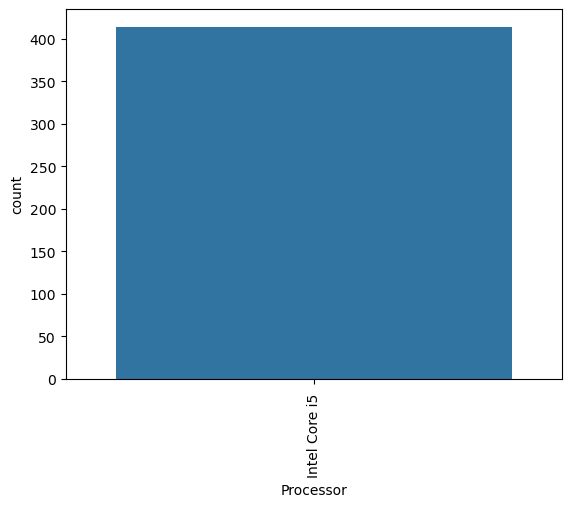

RAM


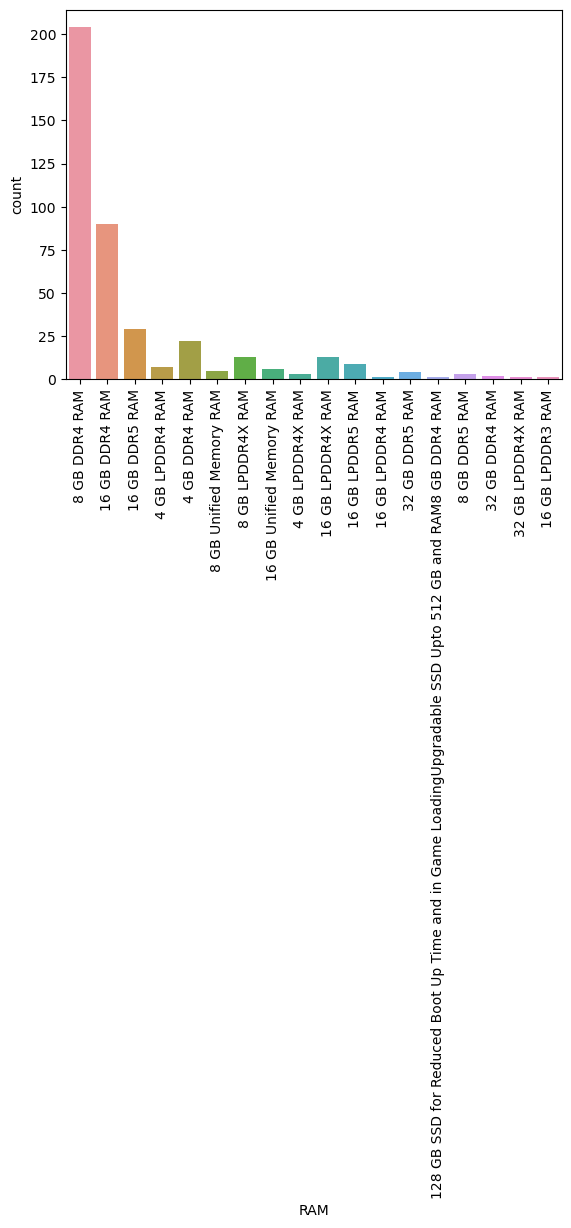

OS


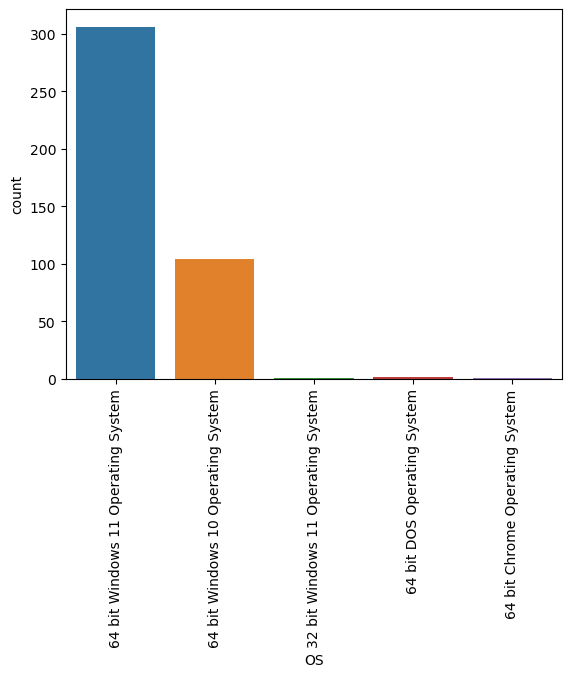

Storage


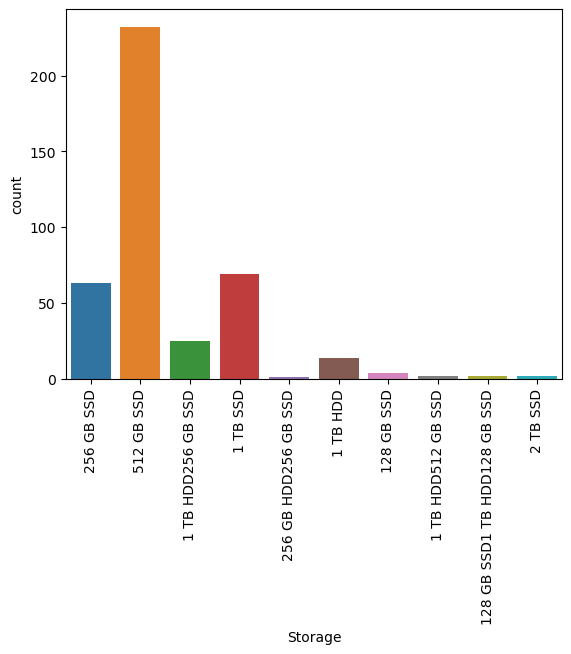

Brand


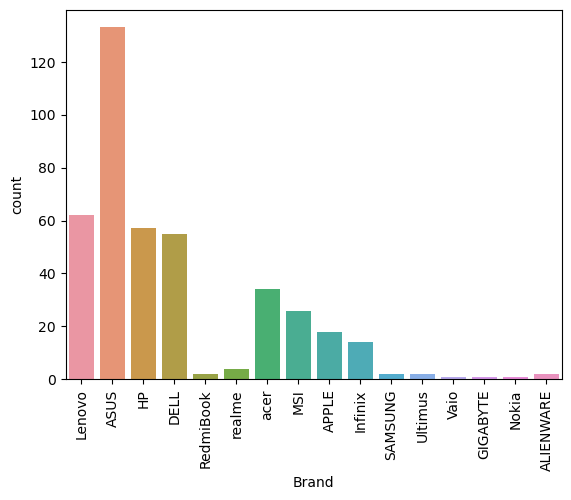

In [15]:
uni_vis(obj)

# observations
-  The Intel core i5 processors are 103 and i3 68  more to compare with other models
- AMD Ryzen 5 dual core, AMD Ryzen 3 hexa core has least count 1.
- 64-bit window 11 operating system is 314 to compare with others
- The 64-bit Chrome operating system has the least count of 1
- The 8GB DDR RAM is 204 and 16 LPDDR3 RAM has least count of 1
- The Asus brand laptops 136 are more to compete with others and LENOVO in 2nd place with 68 laptops
- The 512GB RAM 232 are more compared with others

In [16]:
# for unique values in each feature
for i in df.columns:
    
    print("*"*10,i,"*"*10)

    print(df[i].nunique())

********** Rating **********
18
********** MRP **********
242
********** Processor **********
1
********** RAM **********
18
********** OS **********
5
********** Storage **********
10
********** Brand **********
16


In [17]:
def pie_vis(df):
    for i in df:
        
        print(i)

        df[i].value_counts().plot.pie(autopct="%.2f%%")
        plt.show()

Processor


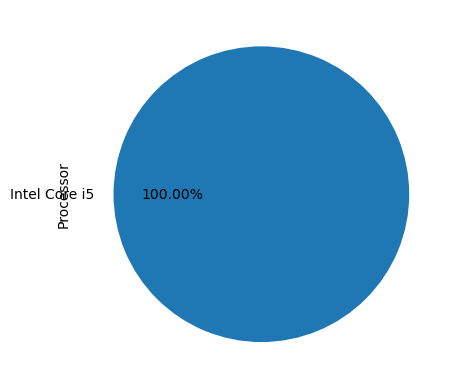

RAM


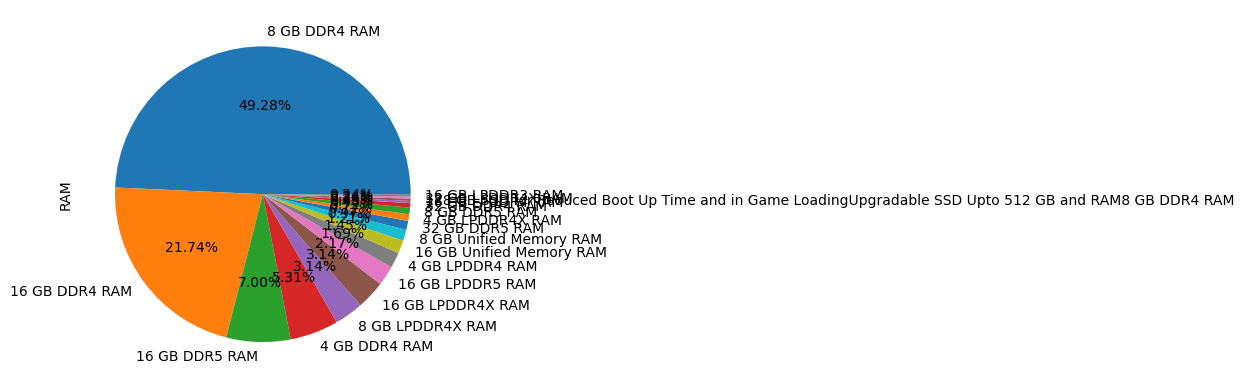

OS


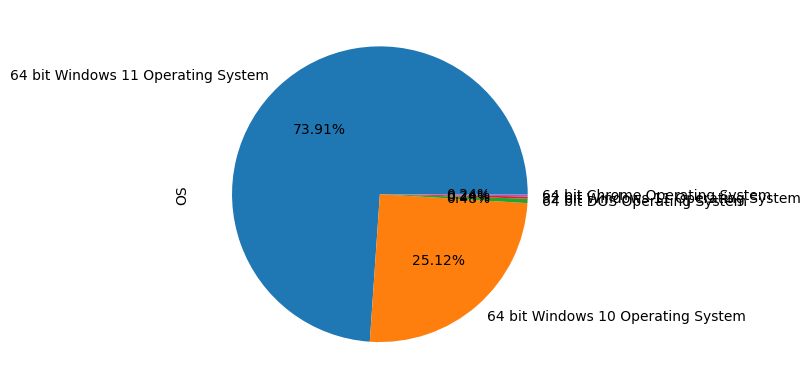

Storage


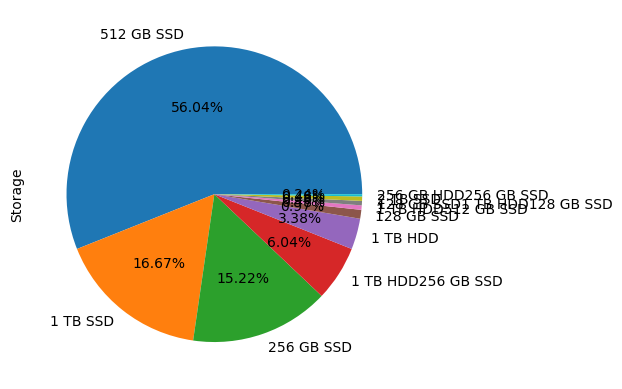

Brand


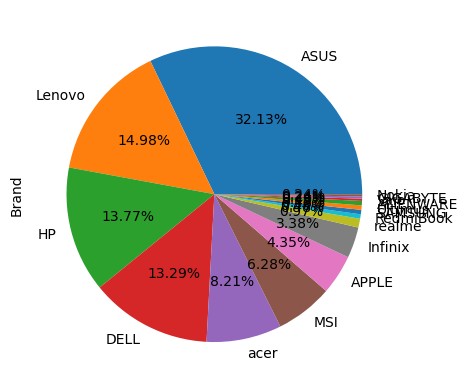

In [18]:
pie_vis(obj)

In [19]:
def uni_box(num):
    for i in num.columns:
        
        print(i)
        sns.boxplot(x=i,data=num)
        plt.show()


        df[i].plot(kind="hist")
        plt.show()

        df[i].plot(kind="kde")
        plt.show()

Rating


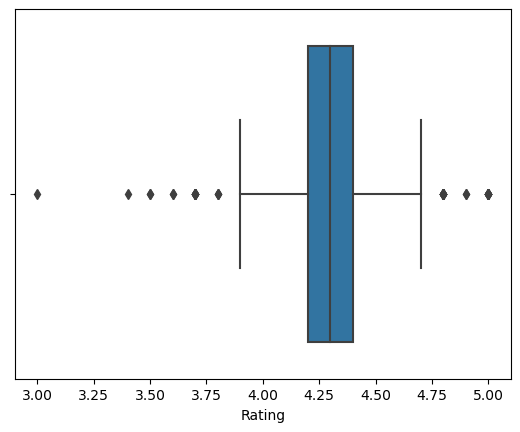

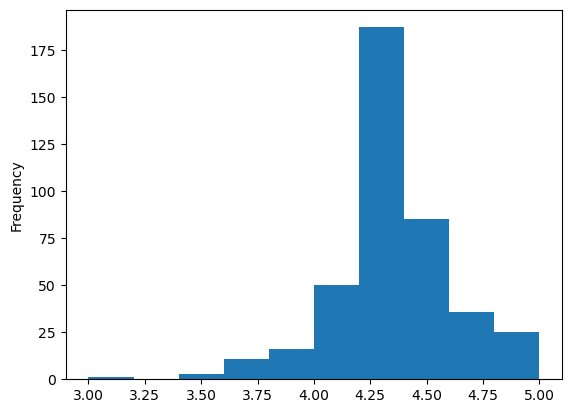

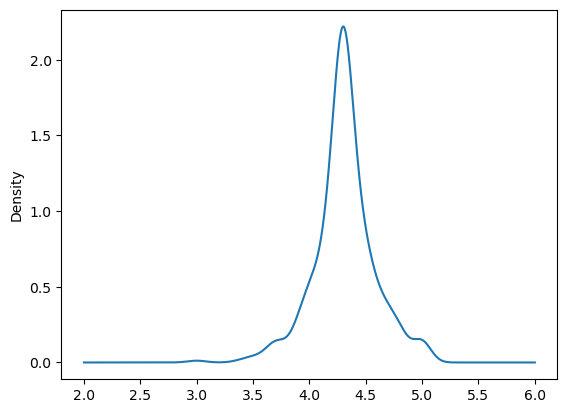

MRP


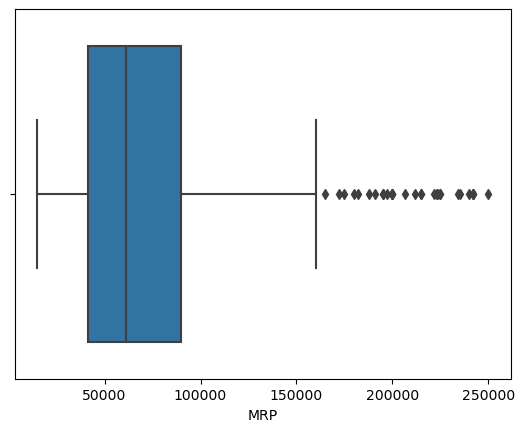

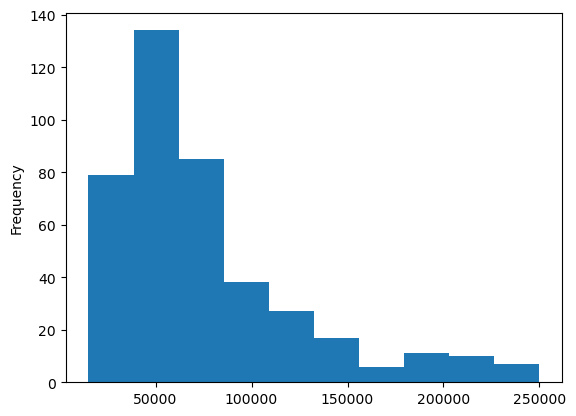

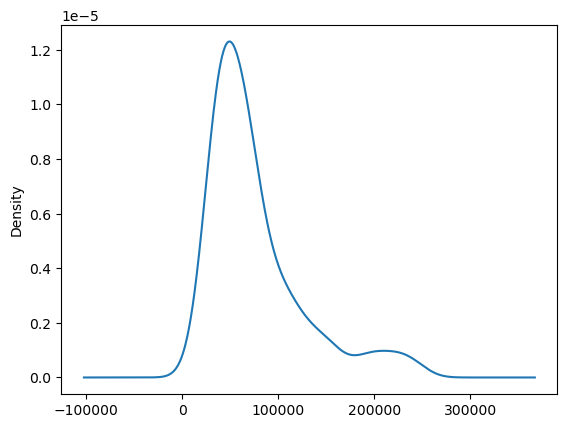

In [20]:
uni_box(num_data)

# observations
- The MRP feature has full oof outliers
- The Rating feature has 8 outliers

In [21]:
def outlier_removing(df,col):

    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    IQR=q3-q1
    lower_bound=q1-(3.0*IQR)
    upper_bound=q3+(3.0*IQR)
    df=df[(df[col]>lower_bound)&(df[col]<upper_bound)]
    return df

In [22]:
df.shape

(414, 7)

In [23]:
df.head()

,Rating,MRP,Processor,RAM,OS,Storage,Brand
0,4.2,36990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,4.2,39990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,4.3,32990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,4.4,49990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,4.4,49990,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS


In [24]:
def box_bi_vis(df,col1,col2):
    sns.boxplot(data=df,x=col1,y=col2)

    plt.xticks(rotation=90)
    plt.show()

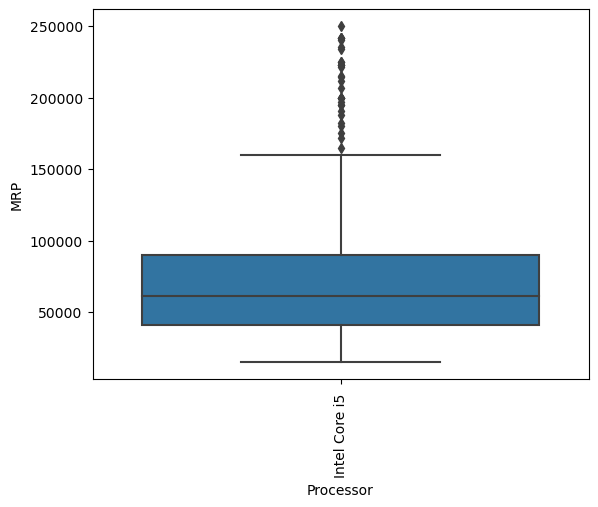

In [25]:
box_bi_vis(df,df["Processor"],df['MRP'])

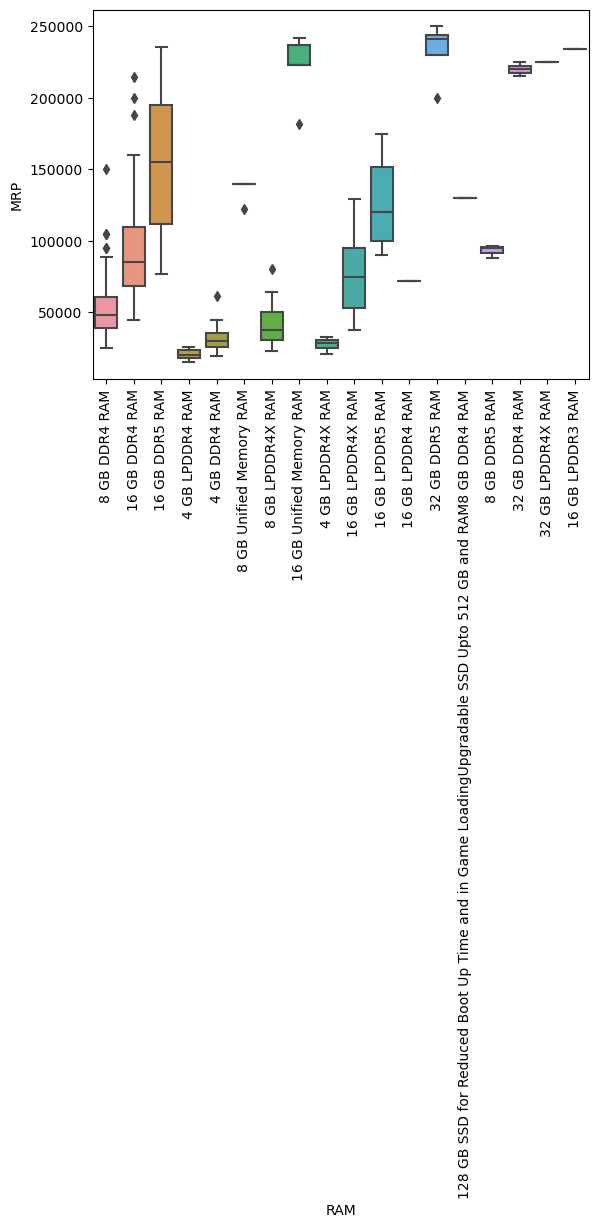

In [26]:
box_bi_vis(df,df["RAM"],df['MRP'])

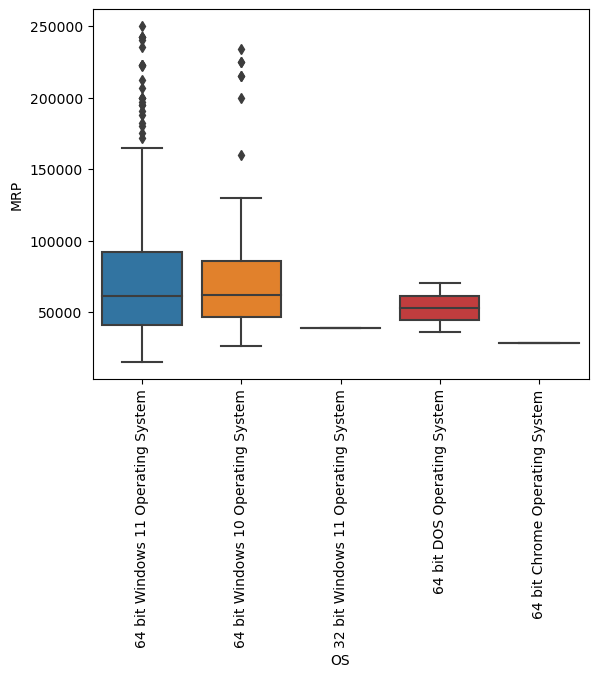

In [27]:
box_bi_vis(df,df["OS"],df['MRP'])

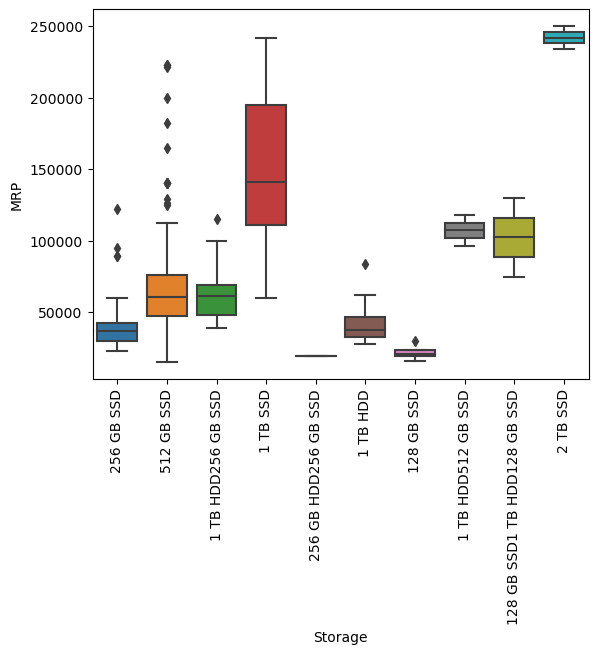

In [28]:
box_bi_vis(df,df["Storage"],df['MRP'])

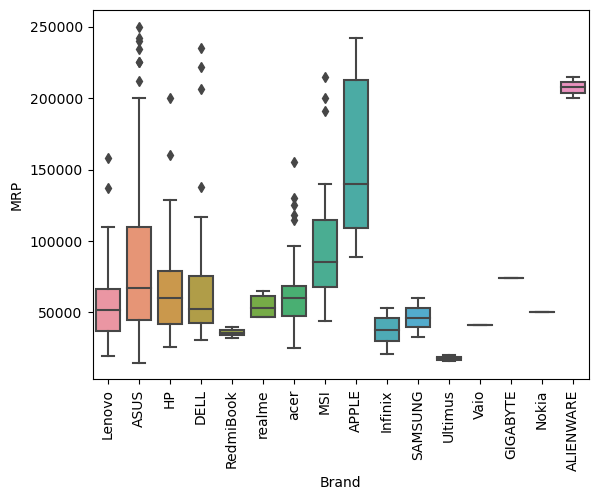

In [29]:
box_bi_vis(df,df["Brand"],df['MRP'])

<Axes: xlabel='Rating', ylabel='MRP'>

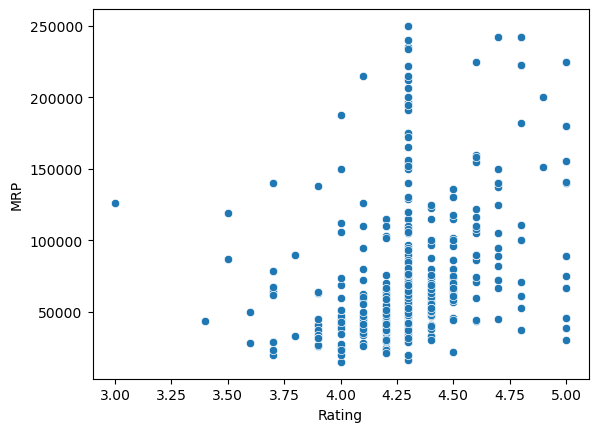

In [30]:
sns.scatterplot(x=df["Rating"],y=df["MRP"])

C:\Users\Vabil\AppData\Local\Temp\ipykernel_24420\1117443564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="crest")


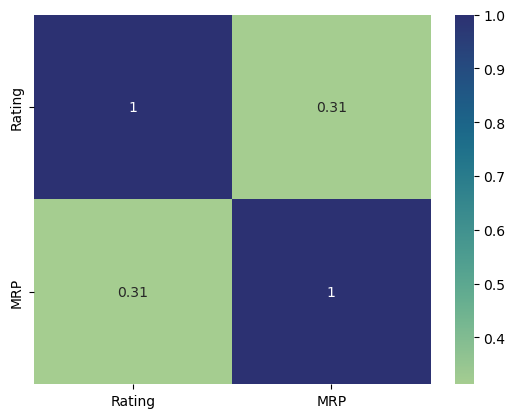

In [31]:
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

# Building model


In [32]:
# assigning the to data variables of x,y
# step 1 identify the input and output features
X = df[["Brand","Rating","Processor","RAM","OS","Storage"]]
y = df["MRP"]

In [33]:
# step 2 split the data train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(351, 6) (351,)
(63, 6) (63,)


In [34]:
X_train.head()

,Brand,Rating,Processor,RAM,OS,Storage
180,ASUS,4.3,Intel Core i5,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD
347,DELL,4.2,Intel Core i5,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
266,Lenovo,3.9,Intel Core i5,4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD
22,Lenovo,3.7,Intel Core i5,4 GB LPDDR4 RAM,64 bit Windows 11 Operating System,256 GB HDD256 GB SSD
46,ASUS,4.1,Intel Core i5,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD


In [35]:
num_data = pd.DataFrame(X_train.index)
num_data.head()

,0
0,180
1,347
2,266
3,22
4,46


In [36]:
# seperating the numeric and ncategorical data
num_data = X_train.select_dtypes("float64")
num_data.head()

,Rating
180,4.3
347,4.2
266,3.9
22,3.7
46,4.1


In [37]:
# step 3
# train data  preprocessing (numerical data)
from sklearn.preprocessing import StandardScaler
num_scaler = StandardScaler()
X_train_num_rescaled =pd.DataFrame(num_scaler.fit_transform(num_data),
                                   index=num_data.index,
                                   columns=num_data.columns)
X_train_num_rescaled.head()

,Rating
180,-0.027364
347,-0.396777
266,-1.505015
22,-2.243840
46,-0.766189


In [38]:
# categorical data indexes appending to to new variable
cat_data = pd.DataFrame(index=X_train.index)
cat_data.head()

""
180
347
266
22
46


In [39]:
# categorical data appending
cat_data_label = X_train[["RAM","Storage"]]
cat_data_label.head()

,RAM,Storage
180,16 GB DDR5 RAM,1 TB SSD
347,16 GB DDR4 RAM,512 GB SSD
266,4 GB DDR4 RAM,256 GB SSD
22,4 GB LPDDR4 RAM,256 GB HDD256 GB SSD
46,8 GB DDR4 RAM,1 TB SSD


In [40]:
cat_data_one = X_train[["Brand","Processor","OS"]]
cat_data_one.head()

,Brand,Processor,OS
180,ASUS,Intel Core i5,64 bit Windows 11 Operating System
347,DELL,Intel Core i5,64 bit Windows 11 Operating System
266,Lenovo,Intel Core i5,64 bit Windows 10 Operating System
22,Lenovo,Intel Core i5,64 bit Windows 11 Operating System
46,ASUS,Intel Core i5,64 bit Windows 10 Operating System


In [41]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(drop="first",sparse_output=False,handle_unknown = 'ignore')
X_train_cat_one_trans = pd.DataFrame(cat_encoder.fit_transform(cat_data_one),
                                columns=cat_encoder.get_feature_names_out(cat_data_one.columns),
                                index=cat_data_one.index)
X_train_cat_one_trans.head()

,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System
180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
46,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
X_train_cat_one_trans.shape

(351, 17)

In [43]:
X_train_cat_lbe = pd.DataFrame(index=X_train.index)
X_train_cat_lbe.head()

""
180
347
266
22
46


In [44]:
ram={'8 GB DDR4 RAM':2, '16 GB DDR4 RAM':3, '16 GB DDR5 RAM':3,
       '4 GB LPDDR4 RAM':1, '4 GB DDR4 RAM':1, '8 GB Unified Memory RAM':2,
       '8 GB LPDDR4X RAM':2, '16 GB Unified Memory RAM':3, '4 GB LPDDR4X RAM':1,
       '16 GB LPDDR4X RAM':3, '16 GB LPDDR5 RAM':3,
       '32 GB Unified Memory RAM':4, '16 GB LPDDR4 RAM':3, '32 GB DDR5 RAM':4,
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM':5,
       '8 GB DDR5 RAM':2, '32 GB DDR4 RAM':4, '32 GB LPDDR4X RAM':4,
       '16 GB LPDDR3 RAM':3}
X_train_cat_lbe["RAM"] =X_train['RAM'].apply(lambda x:ram[x])
X_train_cat_lbe.head()

,RAM
180,3
347,3
266,1
22,1
46,2


In [45]:
storage={'256 GB SSD':2, '512 GB SSD':3, '1 TB HDD256 GB SSD':4, '1 TB SSD':4,
       '256 GB HDD256 GB SSD':2, '1 TB HDD':4, '128 GB SSD':1,
       '1 TB HDD512 GB SSD':4, '128 GB SSD1 TB HDD128 GB SSD':1, '2 TB SSD':5}
X_train_cat_lbe['Storage']=X_train['Storage'].apply(lambda x:storage[x])
X_train_cat_lbe.head()

,RAM,Storage
180,3,4
347,3,3
266,1,2
22,1,2
46,2,4


In [46]:
# merging the numeric and categorical and label data
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_one_trans,X_train_cat_lbe],axis=1)
X_train_transformed.head()

,Rating,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System,RAM,Storage
180,-0.027364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4
347,-0.396777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
266,-1.505015,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2
22,-2.243840,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
46,-0.766189,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,4


In [47]:
# step 4 building the model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train_transformed,y_train)

LinearRegression()

In [48]:
# prediction of train data of train data
y_train_pred_lr = linear_model.predict(X_train_transformed)

In [49]:
# evalution of train data
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred_lr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred_lr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))

print('R Square score: ', metrics.r2_score(y_train, y_train_pred_lr))

Mean Absolute Error:  18862.51215027936
Mean Squared Error:  687839467.7754202
Root Mean Squared Error:  26226.693801839
R Square score:  0.7153427861346078


<function matplotlib.pyplot.show(close=None, block=None)>

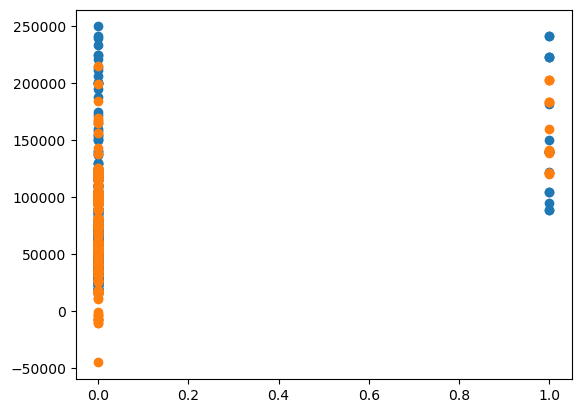

In [50]:
plt.scatter(X_train_transformed["Brand_APPLE"],y_train)
plt.scatter(X_train_transformed["Brand_APPLE"],y_train_pred_lr)
plt.show

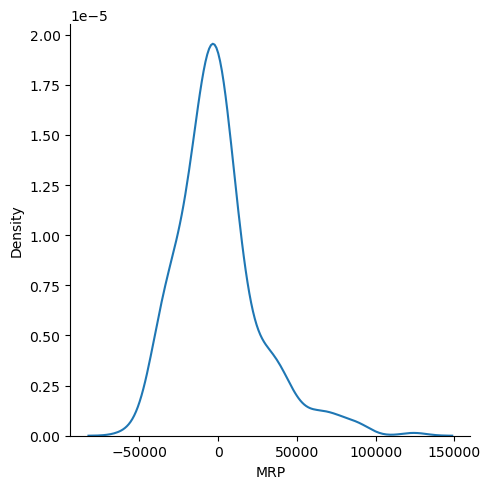

In [51]:
# resudule calcualtion
residule = y_train-y_train_pred_lr
sns.displot(residule,kind="kde")

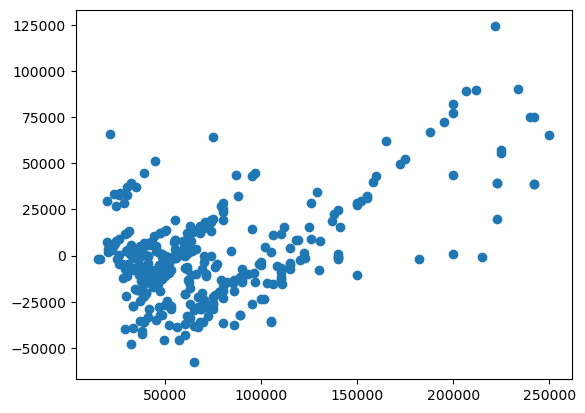

In [52]:
plt.scatter(y_train,residule)
plt.show()

In [53]:
# identify the slopes
print("slopes of linear",linear_model.coef_)

slopes of linear [   1154.74216368  -13592.61112072  -92244.17842767  -97609.00817238
 -121216.52221717 -100715.47925275 -115369.35032993  -97998.33625503
  -97028.32616083 -104168.88687363 -106272.12088036  -75997.25587516
  -53069.90530821 -111962.58119013 -105905.48035277 -100178.12985531
  -12902.87296053  -14464.42615263   42535.76495652   19537.54349796]


In [54]:
# identify the intercept
print("y_intercepts",linear_model.intercept_)

y_intercepts 23482.621259758278


In [55]:
X_test_num =pd.DataFrame(index=X_test.index)
X_test_num.head()

""
358
350
373
399
369


In [56]:
# step 5 test data preprocessing
X_test_num = X_test.select_dtypes("float64")
X_test_num.head()

,Rating
358,4.4
350,4.6
373,4.7
399,5.0
369,4.3


In [57]:
X_test_num_rescaled =pd.DataFrame(num_scaler.transform(X_test_num),
                                   index=X_test_num.index,
                                   columns=X_test_num.columns)
X_test_num_rescaled.head()

,Rating
358,0.342049
350,1.080874
373,1.450287
399,2.558525
369,-0.027364


In [58]:
_X_test_cat_one = pd.DataFrame(index=X_test.index)
_X_test_cat_one.head()

""
358
350
373
399
369


In [59]:
X_test_cat_one =X_test[["Brand","Processor","OS"]]
X_test_cat_one.head()

,Brand,Processor,OS
358,DELL,Intel Core i5,64 bit Windows 10 Operating System
350,DELL,Intel Core i5,64 bit Windows 11 Operating System
373,DELL,Intel Core i5,64 bit Windows 11 Operating System
399,ASUS,Intel Core i5,64 bit Windows 11 Operating System
369,DELL,Intel Core i5,64 bit Windows 10 Operating System


In [60]:
X_test_cat_lbe = pd.DataFrame(index=X_test.index)
X_test_cat_lbe.head()

""
358
350
373
399
369


In [61]:
X_test_cat_lbe = X_test[["RAM","Storage"]]
X_test_cat_lbe.head()

,RAM,Storage
358,4 GB DDR4 RAM,256 GB SSD
350,16 GB DDR5 RAM,1 TB SSD
373,8 GB DDR4 RAM,512 GB SSD
399,16 GB DDR5 RAM,1 TB SSD
369,8 GB DDR4 RAM,256 GB SSD


In [62]:
X_test_cat_one_trans = pd.DataFrame(cat_encoder.transform(X_test_cat_one),
                                columns=cat_encoder.get_feature_names_out(X_test_cat_one.columns),
                                index=X_test_cat_one.index)
X_test_cat_one_trans.head()

C:\Users\Vabil\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System
358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
373,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
369,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
X_test_cat_one_trans.shape

(63, 17)

In [64]:
ram={'8 GB DDR4 RAM':2, '16 GB DDR4 RAM':3, '16 GB DDR5 RAM':3,
       '4 GB LPDDR4 RAM':1, '4 GB DDR4 RAM':1, '8 GB Unified Memory RAM':2,
       '8 GB LPDDR4X RAM':2, '16 GB Unified Memory RAM':3, '4 GB LPDDR4X RAM':1,
       '16 GB LPDDR4X RAM':3, '16 GB LPDDR5 RAM':3,
       '32 GB Unified Memory RAM':4, '16 GB LPDDR4 RAM':3, '32 GB DDR5 RAM':4,
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM':5,
       '8 GB DDR5 RAM':2, '32 GB DDR4 RAM':4, '32 GB LPDDR4X RAM':4,
       '16 GB LPDDR3 RAM':3}
X_test_cat_lbe['RAM'] = X_test_cat_lbe['RAM'].apply(lambda x:ram[x])
X_test_cat_lbe.head()

C:\Users\Vabil\AppData\Local\Temp\ipykernel_24420\2279553541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_lbe['RAM'] = X_test_cat_lbe['RAM'].apply(lambda x:ram[x])


,RAM,Storage
358,1,256 GB SSD
350,3,1 TB SSD
373,2,512 GB SSD
399,3,1 TB SSD
369,2,256 GB SSD


In [65]:
storage={'256 GB SSD':2, '512 GB SSD':3, '1 TB HDD256 GB SSD':4, '1 TB SSD':4,
       '256 GB HDD256 GB SSD':2, '1 TB HDD':4, '128 GB SSD':1,
       '1 TB HDD512 GB SSD':4, '128 GB SSD1 TB HDD128 GB SSD':1, '2 TB SSD':5}
X_test_cat_lbe['Storage']=X_test_cat_lbe['Storage'].apply(lambda x:storage[x])
X_test_cat_lbe.head()

C:\Users\Vabil\AppData\Local\Temp\ipykernel_24420\3345302526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_lbe['Storage']=X_test_cat_lbe['Storage'].apply(lambda x:storage[x])


,RAM,Storage
358,1,2
350,3,4
373,2,3
399,3,4
369,2,2


In [66]:
X_test_cat_one_trans.shape

(63, 17)

In [67]:
X_test_cat_lbe.shape

(63, 2)

In [68]:
X_train_cat_one_trans.shape

(351, 17)

In [69]:
# concating of the test numeric and categorical data
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_one_trans,X_test_cat_lbe],axis=1)
X_test_transformed.head()

,Rating,Brand_APPLE,Brand_ASUS,Brand_DELL,Brand_GIGABYTE,Brand_HP,Brand_Infinix,Brand_Lenovo,Brand_MSI,Brand_Nokia,Brand_RedmiBook,Brand_SAMSUNG,Brand_Ultimus,Brand_Vaio,Brand_acer,Brand_realme,OS_64 bit Windows 10 Operating System,OS_64 bit Windows 11 Operating System,RAM,Storage
358,0.342049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2
350,1.080874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4
373,1.450287,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3
399,2.558525,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,4
369,-0.027364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2


In [70]:
# step 6 prediction of the test data
y_test_pred_lr = linear_model.predict(X_test_transformed)

In [71]:
# step 7 test data evalution
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_lr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_lr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))

print('R Square score: ', metrics.r2_score(y_test, y_test_pred_lr))

Mean Absolute Error:  23641.708962360248
Mean Squared Error:  1069696909.6364579
Root Mean Squared Error:  32706.221268077697
R Square score:  0.5841419169969058


# knn algorithm

In [72]:
# knn algorithm 
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_transformed,y_train)

# train data prediction
y_train_pred_knn =knn_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_train, y_train_pred_knn))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_train, y_train_pred_knn))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_knn)))

print('R Square score: knn', metrics.r2_score(y_train, y_train_pred_knn))



Mean Absolute Error knn:  16377.164672364672
Mean Squared Error: knn 664510124.4020512
Root Mean Squared Error: knn 25778.093886128416
R Square score: knn 0.7249974602222256


In [73]:
# test data prediction
y_test_pred_knn =knn_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_test, y_test_pred_knn))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_test, y_test_pred_knn))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn)))

print('R Square score: knn', metrics.r2_score(y_test, y_test_pred_knn))


Mean Absolute Error knn:  22601.920634920636
Mean Squared Error: knn 1180410971.8698416
Root Mean Squared Error: knn 34357.10948071507
R Square score: knn 0.5411004374272326


# hyper para meters of knn


In [74]:
# knn algorithm 
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train_transformed,y_train)

# train data prediction
y_train_pred_knn =knn_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_train, y_train_pred_knn))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_train, y_train_pred_knn))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_knn)))

print('R Square score: knn', metrics.r2_score(y_train, y_train_pred_knn))



Mean Absolute Error knn:  17423.40293040293
Mean Squared Error: knn 716451690.1940229
Root Mean Squared Error: knn 26766.615217356542
R Square score: knn 0.703501832107184


In [75]:
# test data prediction
y_test_pred_knn =knn_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_test, y_test_pred_knn))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_test, y_test_pred_knn))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn)))

print('R Square score: knn', metrics.r2_score(y_test, y_test_pred_knn))


Mean Absolute Error knn:  18706.41723356009
Mean Squared Error: knn 830333907.2588272
Root Mean Squared Error: knn 28815.515044135984
R Square score: knn 0.6771972847500538


# Decision tree algorithms

In [76]:
## without using hyperparameter
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_transformed,y_train)

# train data prediction
y_train_pred_dt =dt_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error dt: ', metrics.mean_absolute_error(y_train, y_train_pred_dt))

print('Mean Squared Error: dt', metrics.mean_squared_error(y_train, y_train_pred_dt))

print('Root Mean Squared Error: dt', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dt)))

print('R Square score: dt', metrics.r2_score(y_train, y_train_pred_dt))



Mean Absolute Error dt:  6273.169285035952
Mean Squared Error: dt 181403545.4745896
Root Mean Squared Error: dt 13468.61334639129
R Square score: dt 0.9249275008787945


In [77]:
## without using hyperparameter
# test data prediction
y_test_pred_dt =dt_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_test, y_test_pred_dt))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_test, y_test_pred_dt))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)))

print('R Square score: knn', metrics.r2_score(y_test, y_test_pred_dt))


Mean Absolute Error knn:  18796.01681783825
Mean Squared Error: knn 615521696.2002821
Root Mean Squared Error: knn 24809.709716163186
R Square score: knn 0.7607082246169572


# hyper parameter tuning

In [88]:
## without using hyperparameter
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=8)
dt_model.fit(X_train_transformed,y_train)

# train data prediction
y_train_pred_dt =dt_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error dt: ', metrics.mean_absolute_error(y_train, y_train_pred_dt))

print('Mean Squared Error: dt', metrics.mean_squared_error(y_train, y_train_pred_dt))

print('Root Mean Squared Error: dt', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dt)))

print('R Square score: dt', metrics.r2_score(y_train, y_train_pred_dt))



Mean Absolute Error dt:  9937.161880544192
Mean Squared Error: dt 261313853.29891056
Root Mean Squared Error: dt 16165.205018771354
R Square score: dt 0.8918572182764244


In [89]:
## without using hyperparameter
# test data prediction
y_test_pred_dt =dt_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error dt: ', metrics.mean_absolute_error(y_test, y_test_pred_dt))

print('Mean Squared Error: dt', metrics.mean_squared_error(y_test, y_test_pred_dt))

print('Root Mean Squared Error: dt', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)))

print('R Square score: dt', metrics.r2_score(y_test, y_test_pred_dt))


Mean Absolute Error dt:  19341.52468928605
Mean Squared Error: dt 642878571.4619944
Root Mean Squared Error: dt 25355.050216120544
R Square score: dt 0.7500728964218362


In [80]:
#  parameter feature importance

dt_model.feature_importances_

array([6.45123166e-02, 1.67324090e-01, 4.39218569e-03, 4.36541371e-03,
       0.00000000e+00, 7.61985723e-03, 7.36777122e-03, 1.16900935e-03,
       1.00692283e-03, 0.00000000e+00, 0.00000000e+00, 4.90971663e-04,
       7.93202190e-06, 0.00000000e+00, 2.30825899e-03, 7.35043473e-05,
       5.43222448e-03, 2.40516226e-03, 5.30770470e-01, 2.00753910e-01])

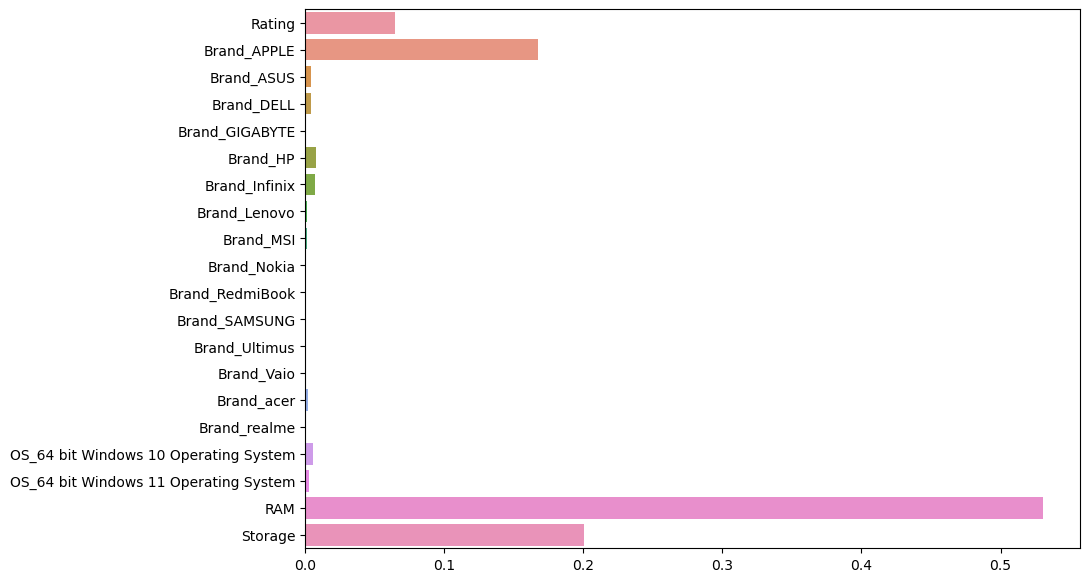

In [81]:
# feature importance with max depth=none
plt.figure(figsize=(10,7))

sns.barplot(x = dt_model.feature_importances_, y = X_train_transformed.columns)

plt.show()

# support vector machines

In [90]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train_transformed,y_train)

# train data prediction
y_train_pred_svr =svr_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error svr: ', metrics.mean_absolute_error(y_train, y_train_pred_svr))

print('Mean Squared Error: svr', metrics.mean_squared_error(y_train, y_train_pred_svr))

print('Root Mean Squared Error: svr', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_svr)))

print('R Square score: svr', metrics.r2_score(y_train, y_train_pred_svr))


Mean Absolute Error svr:  33378.45218464823
Mean Squared Error: svr 2629316761.0450397
Root Mean Squared Error: svr 51276.86379884245
R Square score: svr -0.08812305578985602


In [91]:
# test data prediction
y_test_pred_svr =dt_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error svr: ', metrics.mean_absolute_error(y_test, y_test_pred_svr))

print('Mean Squared Error: svr', metrics.mean_squared_error(y_test, y_test_pred_svr))

print('Root Mean Squared Error: svr', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_svr)))

print('R Square score: svr', metrics.r2_score(y_test, y_test_pred_svr))


Mean Absolute Error svr:  19341.52468928605
Mean Squared Error: svr 642878571.4619944
Root Mean Squared Error: svr 25355.050216120544
R Square score: svr 0.7500728964218362


# Random forest algorithm

In [82]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()
random_model.fit(X_train_transformed,y_train)

# prediction of train data
y_train_pred_rf = random_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error rf: ', metrics.mean_absolute_error(y_train, y_train_pred_rf))

print('Mean Squared Error: rf', metrics.mean_squared_error(y_train, y_train_pred_rf))

print('Root Mean Squared Error: rf', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)))

print('R Square score: rf', metrics.r2_score(y_train, y_train_pred_rf))



Mean Absolute Error rf:  8979.884416597468
Mean Squared Error: rf 223557846.96236086
Root Mean Squared Error: rf 14951.850954392265
R Square score: rf 0.9074822588185227


In [83]:
# test data prediction
y_test_pred_rf =random_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error knn: ', metrics.mean_absolute_error(y_test, y_test_pred_rf))

print('Mean Squared Error: knn', metrics.mean_squared_error(y_test, y_test_pred_rf))

print('Root Mean Squared Error: knn', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)))

print('R Square score: knn', metrics.r2_score(y_test, y_test_pred_rf))


Mean Absolute Error knn:  16898.991428223835
Mean Squared Error: knn 478295012.0231723
Root Mean Squared Error: knn 21869.956836335372
R Square score: knn 0.814056818321092


# AdaBoost algorithm

In [84]:
from sklearn.ensemble import AdaBoostRegressor
AB_model = AdaBoostRegressor()
AB_model.fit(X_train_transformed,y_train)

# prediction of train data
y_train_pred_ab = AB_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error ad: ', metrics.mean_absolute_error(y_train, y_train_pred_ab))

print('Mean Squared Error: ad', metrics.mean_squared_error(y_train, y_train_pred_ab))

print('Root Mean Squared Error: ad', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ab)))

print('R Square score: ad', metrics.r2_score(y_train, y_train_pred_ab))



Mean Absolute Error rf:  17695.98841208083
Mean Squared Error: rf 593472626.0761752
Root Mean Squared Error: rf 24361.29360432601
R Square score: rf 0.754395797044639


In [85]:
# test data prediction
y_test_pred_ab =AB_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error ad: ', metrics.mean_absolute_error(y_test, y_test_pred_ab))

print('Mean Squared Error: ad', metrics.mean_squared_error(y_test, y_test_pred_ab))

print('Root Mean Squared Error: ad', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ab)))

print('R Square score: ad', metrics.r2_score(y_test, y_test_pred_ab))


Mean Absolute Error knn:  19778.967556790554
Mean Squared Error: knn 712307199.2344508
Root Mean Squared Error: knn 26689.08389650066
R Square score: knn 0.7230816470399888


# GBDT  algorithm

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train_transformed,y_train)

# prediction of train data
y_train_pred_gb = GB_model.predict(X_train_transformed)

# train data evalution
print('Mean Absolute Error : gb', metrics.mean_absolute_error(y_train, y_train_pred_gb))

print('Mean Squared Error: gb', metrics.mean_squared_error(y_train, y_train_pred_gb))

print('Root Mean Squared Error: gb', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_gb)))

print('R Square score: gb', metrics.r2_score(y_train, y_train_pred_gb))



Mean Absolute Error : gb 12062.739429711433
Mean Squared Error: gb 320737269.7227871
Root Mean Squared Error: gb 17909.139279227995
R Square score: gb 0.8672652822941952


In [87]:
# test data prediction
y_test_pred_gb =AB_model.predict(X_test_transformed)

# train data evalution
print('Mean Absolute Error gb: ', metrics.mean_absolute_error(y_test, y_test_pred_gb))

print('Mean Squared Error: gb', metrics.mean_squared_error(y_test, y_test_pred_gb))

print('Root Mean Squared Error: gb', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_gb)))

print('R Square score: gb', metrics.r2_score(y_test, y_test_pred_gb))


Mean Absolute Error gb:  19778.967556790554
Mean Squared Error: gb 712307199.2344508
Root Mean Squared Error: gb 26689.08389650066
R Square score: gb 0.7230816470399888


In [96]:
y_train.head()

180    154990
347    101990
266     26490
22      19490
46      94990
Name: MRP, dtype: int64


# Grid search cv & Randomised search cv

In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.tree  import  DecisionTreeRegressor
tuned_parameters = [{'max_depth':[i for i in range(1, 16)]}]

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15]}],
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeRegressor(max_depth=5)

Score on Test Data:  0.7528447552982908


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the hyperparameters you want to tune
tuned_parameters = [{'n_neighbors': list(range(1, 16))}]

# Create the KNeighborsRegressor estimator
estimator = KNeighborsRegressor()

# Create the GridSearchCV object
clf = GridSearchCV(
    estimator=estimator,
    param_grid=tuned_parameters,
    scoring='r2',  # Use R-squared as the evaluation metric
    cv=5,
    return_train_score=True,
    verbose=1,
    error_score="raise"  # Raise an error for invalid parameter settings
)

# Fit the model with the training data
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, error_score='raise', estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]}],
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set:
{'n_neighbors': 8}
KNeighborsRegressor(n_neighbors=8)

Score on Test Data:  0.6460662312559566


# observations
- The `Random forest` algorithm generated best model with `r squared score on test data 81`
- The `Decision tree` generated model with `r squared score with test data 75`
- The `Grid search cv` of decision tree also gives best model test score of `75 and knn with 64`
- Hence the `Random forest` gives best model